# Dicoding Beginer Machine Learning Class

Name: Fajri Ardiansyah

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil
import zipfile
from sklearn.model_selection import train_test_split
%matplotlib inline

# Dataset 

## Get Dataset From Server

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2021-07-27 17:33:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.12MB/s    in 66s     

2021-07-27 17:34:08 (4.70 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# extraction
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## Directory

In [4]:
# directory pathing
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [5]:
# directory for train and validation
if os.path.exists(train_dir):
  shutil.rmtree(train_dir)

if os.path.exists(validation_dir):
  shutil.rmtree( validation_dir)
  
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [6]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

## Spliting Dataset

In [7]:
# split each directory to train and validation data 
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [8]:
# copy data to new directory
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

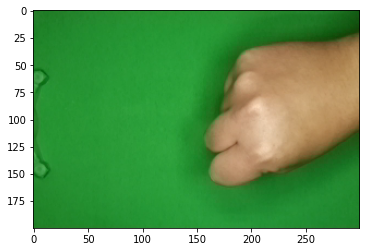

In [9]:
# example of data rock visualization
img = mpimg.imread(train_rock + "/" + os.listdir(train_rock)[0])
plt.imshow(img)
plt.show()

# Processing

## Image Data Generator

In [10]:
# Create Image Data Generator Object
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.5,1.5],
    brightness_range=[0.5,1.5],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.5,1.5],
    brightness_range=[0.5,1.5],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150) 
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150)
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## Keras Model

In [11]:
# Create Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

# metrics to be evaluated by the model
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']
              )

In [12]:
# Create early stop method using callback function to avoid overfitting
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5
)

# Train Model
fit_model = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples/val_generator.batch_size,
    verbose=2,
    callbacks=[callback]
)
fit_model

Epoch 1/20
41/41 - 91s - loss: 1.1015 - accuracy: 0.4162 - val_loss: 1.0379 - val_accuracy: 0.4658
Epoch 2/20
41/41 - 89s - loss: 0.9670 - accuracy: 0.5267 - val_loss: 0.8235 - val_accuracy: 0.6290
Epoch 3/20
41/41 - 89s - loss: 0.7077 - accuracy: 0.6966 - val_loss: 0.5997 - val_accuracy: 0.7614
Epoch 4/20
41/41 - 88s - loss: 0.6078 - accuracy: 0.7416 - val_loss: 0.5380 - val_accuracy: 0.7922
Epoch 5/20
41/41 - 88s - loss: 0.5371 - accuracy: 0.7835 - val_loss: 0.4734 - val_accuracy: 0.8025
Epoch 6/20
41/41 - 88s - loss: 0.4772 - accuracy: 0.8049 - val_loss: 0.4930 - val_accuracy: 0.8128
Epoch 7/20
41/41 - 88s - loss: 0.3900 - accuracy: 0.8438 - val_loss: 0.4327 - val_accuracy: 0.8379
Epoch 8/20
41/41 - 88s - loss: 0.3357 - accuracy: 0.8674 - val_loss: 0.2336 - val_accuracy: 0.9110
Epoch 9/20
41/41 - 88s - loss: 0.2658 - accuracy: 0.9085 - val_loss: 0.2514 - val_accuracy: 0.9247
Epoch 10/20
41/41 - 88s - loss: 0.2739 - accuracy: 0.8971 - val_loss: 0.2058 - val_accuracy: 0.9304
Epoch 11/

# Visualization Accuracy and Loss Model

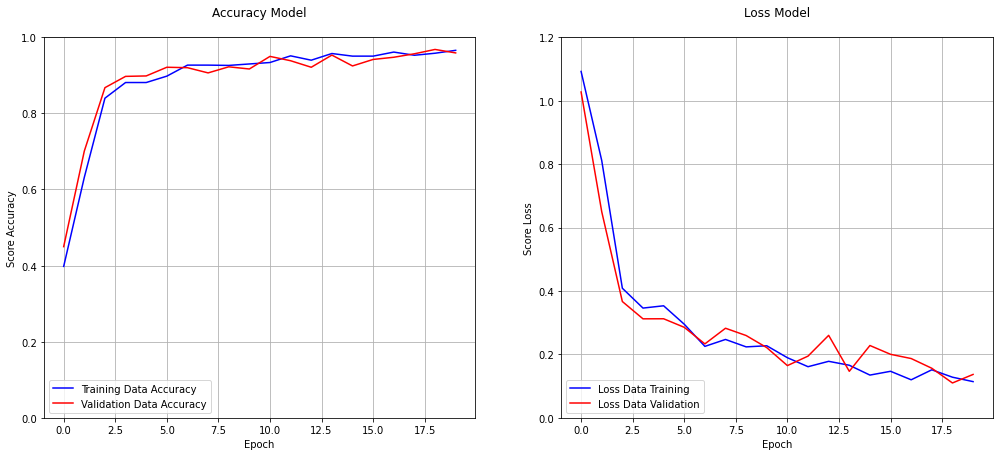

In [17]:
 fig, ax = plt.subplots(1, 2, figsize=(17, 7))

ax[0].plot(fit_model.history['accuracy'], color='blue', label='Training Data Accuracy')
ax[0].plot(fit_model.history['val_accuracy'], color='red', label='Validation Data Accuracy')
ax[0].set_title('Accuracy Model\n')
ax[0].legend(loc=3)
ax[0].set_ylim(0,1)
ax[0].grid(True)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Score Accuracy')

ax[1].plot(fit_model.history['loss'], color='blue', label='Loss Data Training')
ax[1].plot(fit_model.history['val_loss'], color='red', label='Loss Data Validation')
ax[1].set_title('Loss Model\n')
ax[1].legend(loc=3)
ax[1].set_ylim(0,1.2)
ax[1].grid(True)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Score Loss')

plt.show()

The data looks good, because when the data train increases in accuracy, the data validation also increases. But from epoch 16 the data looks a bit overfitting, because patience from callback method set to 5, so early stop method not active.

In [18]:
print('Maksimum Accuracy Data Training: ', np.max(fit_model.history['accuracy']))
print('Maksimum Accuracy Data Validation: ', np.max(fit_model.history['val_accuracy']))

Maksimum Accuracy Data Training:  0.9657012224197388
Maksimum Accuracy Data Validation:  0.9680365324020386


# Test Model Using Image

In [ ]:
# class label
classes = ['rock', 'paper', 'scissors']
label = train_generator.class_indices
print(label)

In [20]:
# fuction to test image
def test_image(uploaded):
  for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    classes = pred.argmax(axis=-1)
    
    print(fn)
    if classes==2:
      print('scissors')
    elif classes==1:
      print('rock')
    elif classes==0:
      print('paper')

Saving test_scissors.png to test_scissors.png
test_scissors.png
scissors


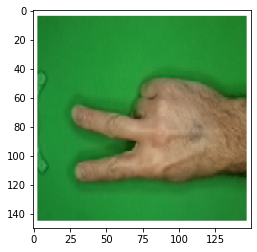

In [21]:
uploaded = files.upload()
test_image(uploaded)

Saving test_paper.png to test_paper.png
test_paper.png
paper


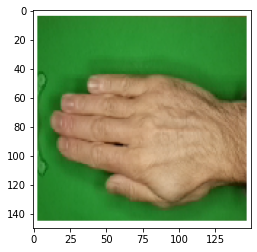

In [22]:
uploaded = files.upload()
test_image(uploaded)

Saving test_rock.png to test_rock (1).png
test_rock.png
rock


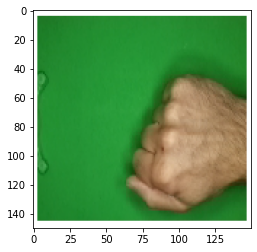

In [29]:
uploaded = files.upload()
test_image(uploaded)